,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


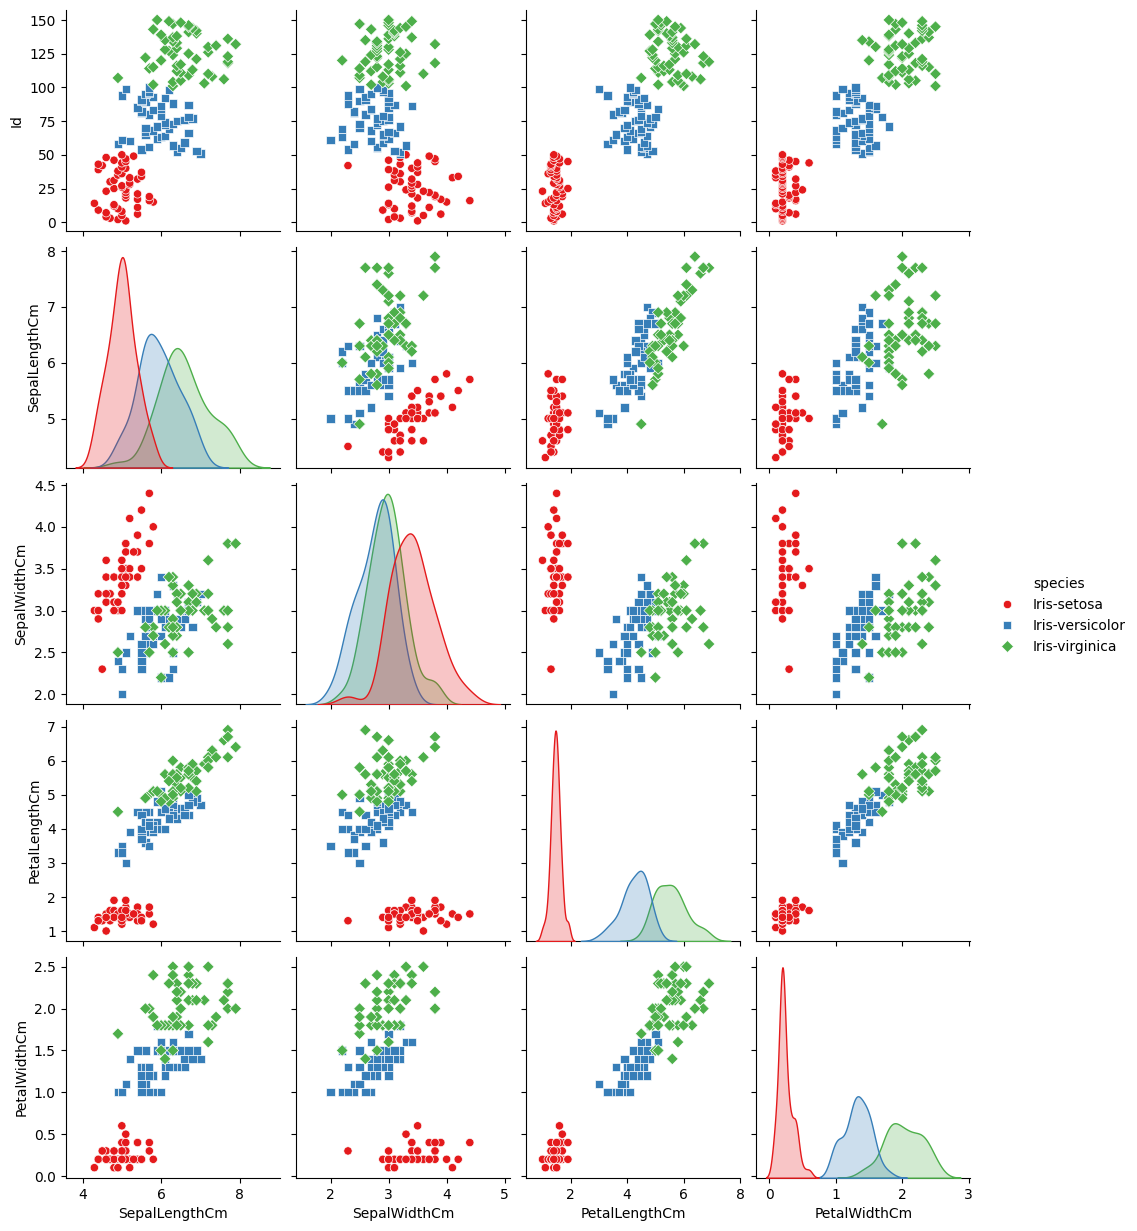


Logistic Regression Accuracy 0.9

MultinomialNaiveBias Accuracy 0.8333333333333334

Logistic Regression confusion_matrix
 [[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]

MultinomialNaiveBias confusion_matrix
 [[10  0  0]
 [ 0  7  3]
 [ 0  2  8]]

Logistic Regression classification_report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30


MultinomialNaiveBias classification_report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.78      0.70      0.74        10
 Iris-virginica       0.73      0.80      0.76        10

       accuracy                           

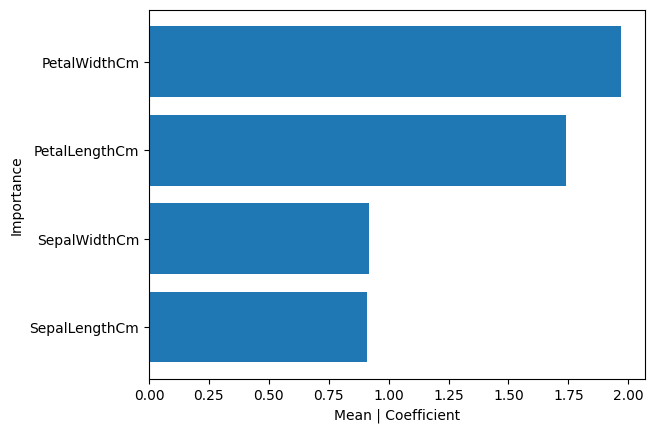

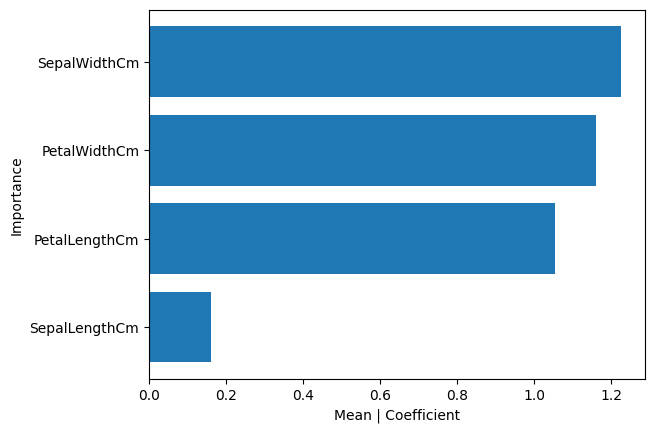

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('iris.csv')
display(df.head())

feature_colums = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_colums].values
y = df['species'].values

sns.pairplot(df, x_vars=feature_colums, hue='species', diag_kind='kde', markers=['o', 's', 'D'], palette='Set1')
plt.show()

X_scaled = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_log = lr_model.predict(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print('\nLogistic Regression Accuracy', accuracy_score(y_test, y_pred_log))
print('\nMultinomialNaiveBias Accuracy', accuracy_score(y_test, y_pred_nb))

print('\nLogistic Regression confusion_matrix\n', confusion_matrix(y_test, y_pred_log))
print('\nMultinomialNaiveBias confusion_matrix\n', confusion_matrix(y_test, y_pred_nb))

print('\nLogistic Regression classification_report\n', classification_report(y_test, y_pred_log))
print('\nMultinomialNaiveBias classification_report\n', classification_report(y_test, y_pred_nb))

importance = np.mean(np.abs(lr_model.coef_), axis=0)
imp_df = pd.DataFrame({'Feature': feature_colums, 'Importances': importance}).sort_values('Importances')

plt.barh(imp_df['Feature'], imp_df['Importances'])
plt.xlabel('Mean | Coefficient')
plt.ylabel('Importance')
plt.show()


log_prob = nb_model.feature_log_prob_
importance = np.abs(log_prob[0] - log_prob[1])
imp_df = pd.DataFrame({'Feature': feature_colums, 'Importances': importance}).sort_values('Importances')

plt.barh(imp_df['Feature'], imp_df['Importances'])
plt.xlabel('Mean | Coefficient')
plt.ylabel('Importance')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
df = pd.read_csv('iris.csv')
display(df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


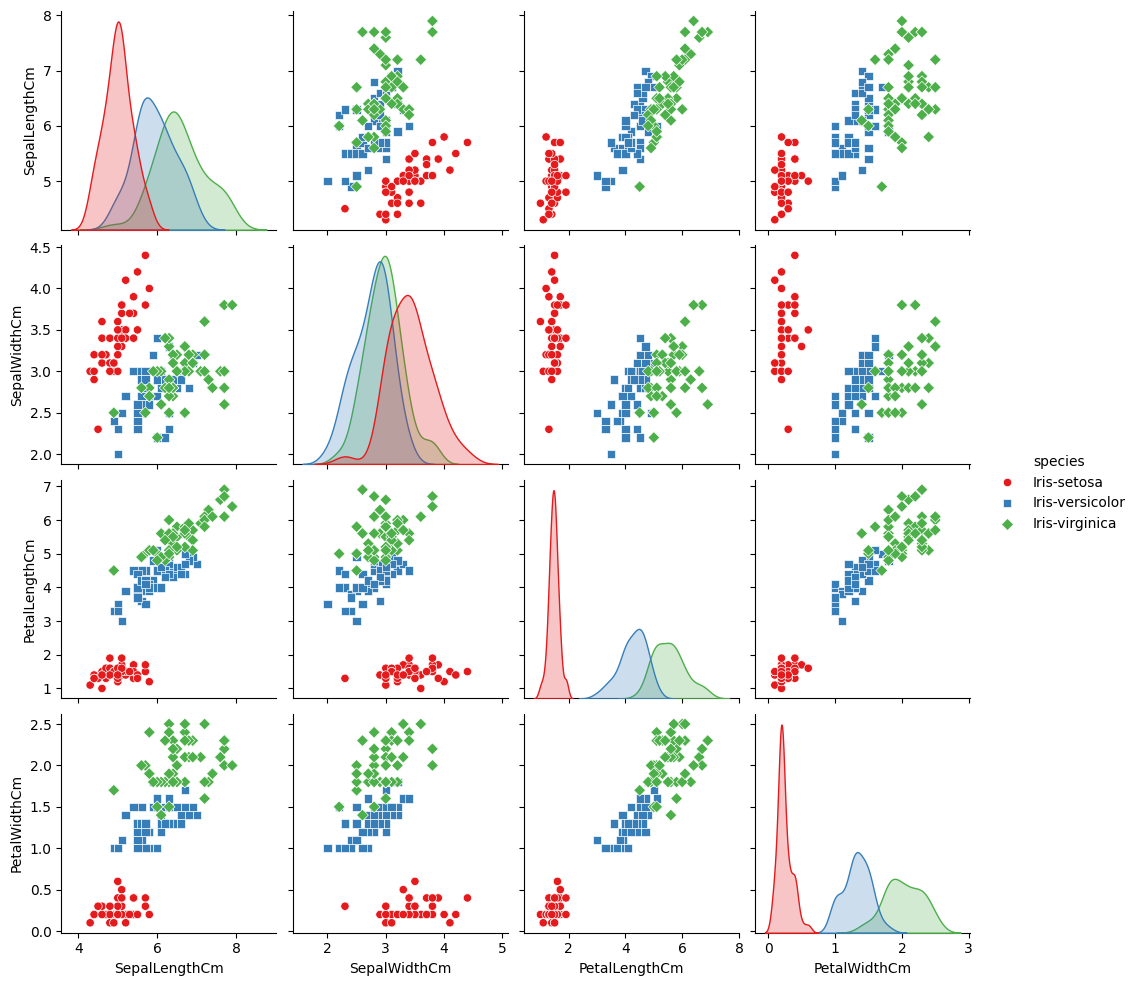

In [ ]:
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df[feature_cols].values
y = df['species'].values

sns.pairplot(df, vars=feature_cols, hue='species', diag_kind='kde', markers=['o', 's', 'D'], palette='Set1') # kde = kernel density plots
plt.show()

In [ ]:
X_scaled = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print('\nLogistic Regression Accuracy', accuracy_score(y_test, y_pred_log))
print('\nMultinomialNaiveBias Accuracy', accuracy_score(y_test, y_pred_nb))

print('\nLogistic Regression confusion_matrix\n', confusion_matrix(y_test, y_pred_log))
print('\nMultinomialNaiveBias confusion_matrix\n', confusion_matrix(y_test, y_pred_nb))

print('\nLogistic Regression classification_report\n', classification_report(y_test, y_pred_log))
print('\nMultinomialNaiveBias classification_report\n', classification_report(y_test, y_pred_nb))



Logistic Regression Accuracy 0.9

MultinomialNaiveBias Accuracy 0.8333333333333334

Logistic Regression confusion_matrix
 [[10  0  0]
 [ 0  8  2]
 [ 0  1  9]]

MultinomialNaiveBias confusion_matrix
 [[10  0  0]
 [ 0  7  3]
 [ 0  2  8]]

Logistic Regression classification_report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      0.80      0.84        10
 Iris-virginica       0.82      0.90      0.86        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30


MultinomialNaiveBias classification_report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.78      0.70      0.74        10
 Iris-virginica       0.73      0.80      0.76        10

       accuracy                           

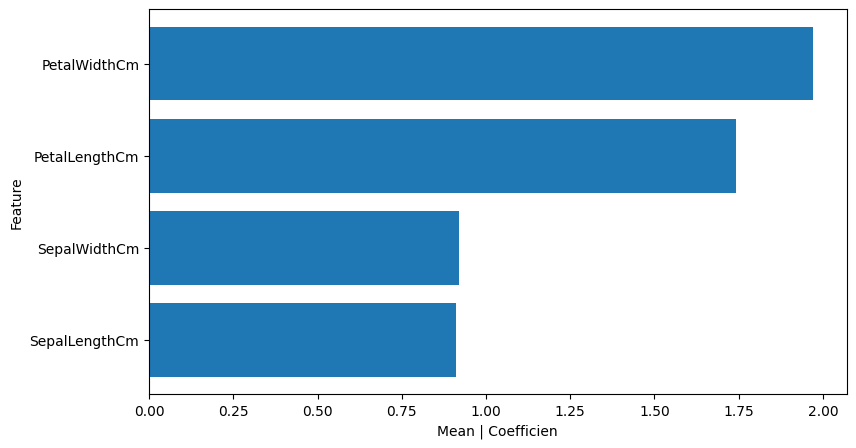

In [ ]:
importances = np.mean(np.abs(log_model.coef_), axis=0)
imp_df = pd.DataFrame({'Feature': feature_cols, 'Importance': importances}).sort_values('Importance')

plt.figure(figsize=(9, 5))
plt.barh(imp_df['Feature'], imp_df['Importance'])
plt.xlabel('Mean | Coefficien')
plt.ylabel('Feature')
plt.show()

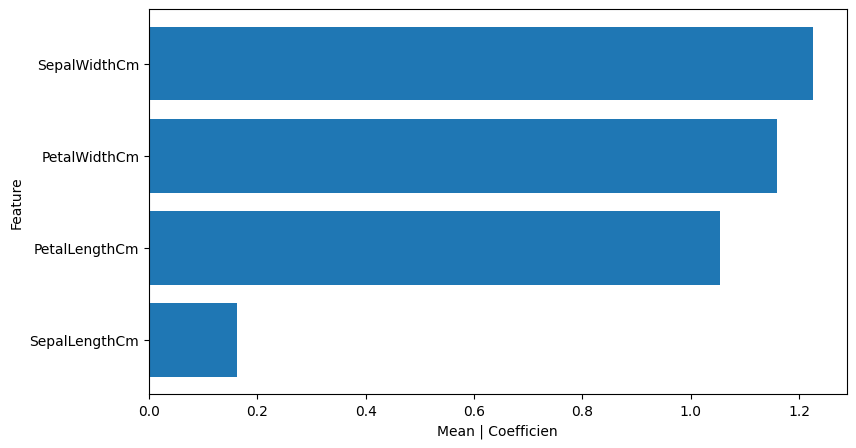

In [ ]:
log_prob = nb_model.feature_log_prob_
importances = np.abs(log_prob[0] - log_prob[1])
imp_df = pd.DataFrame({'Feature': feature_cols, 'Importance': importances}).sort_values('Importance')

plt.figure(figsize=(9, 5))
plt.barh(imp_df['Feature'], imp_df['Importance'])
plt.xlabel('Mean | Coefficien')
plt.ylabel('Feature')
plt.show()
